# Getting Started

To run the code below you must install packages:

- rpy2 module (pip install rpy2)

- missingno module (pip install missingno)

- imputena module (pip install imputena)

- missingpy module (pip install missingpy)

- gcimpute module (pip install gcimpute)

- scikit-learn module (pip install sklearn)

- torch module (pip install torch)

- keras module (pip install keras)

- tensorflow module (pip install tensorflow)

- python-utils module (pip install python-utils)

- R Package (https://cran.r-project.org/bin/windows/base/). I suggest install RStudio (https://www.rstudio.com/products/rstudio/download/)

- Naniar package (https://cran.r-project.org/web/packages/naniar/index.html)


### Load and run packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#You should set you R Path here
import os
os.environ['R_HOME'] = 'C:\Program Files\R\R-4.2.1'
from IPython import display
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

%run load_data/load_data.ipynb
%run missing_data_generation/missing_values_generator.ipynb
%run visualization/missing_data_visualization.ipynb
%run missing_mechanism_detection/little_test.ipynb
%run missing_mechanism_detection/dixon_test.ipynb
%run missing_mechanism_detection/homoscedasticity_test.ipynb
%run missing_mechanism_detection/rb_test.ipynb
%run imputation/imputation_methods.ipynb
%run classifiers/classifiers.ipynb
display.clear_output(wait=True)

### Set filename and load dataset

In [ ]:
# Get the dataset file
filename = input('Enter the path and name of the .csv file (Ex.: "C:\Anaconda\Scripst\dataset.csv"): ')

In [ ]:
# Load dataset
import chardet
%run load_data/load_data.ipynb
delimiter = ";" #Change the delimiter if necessary
with open(filename, 'rb') as f:
    data = f.read()
    encode = chardet.detect(data)['encoding']

#encode = "UTF-8"
original_data = load_dataset(filename,delimiter, encode)

# Convert entire DataFrame string to float
#original_data = original_data.astype(float)

#Let's separate the class labels to generate the missings and imputations
#Get the input features
columns = original_data.columns
class_name = columns[-1] #Get name of the last column (class)
columns_tmp = list(columns)
columns_tmp.remove(class_name)

data_x =original_data.iloc[:, 0:original_data.shape[1]-1].values #Predictive attributes
data_y = original_data.iloc[:, -1].values #Class attribute
X = pd.DataFrame(data_x, columns = columns_tmp) #Get a pandas dataframe from data (predictive attributes)
y = pd.DataFrame(data_y, columns = [class_name]) #Get a pandas dataframe from data (class attribute)

### Viewing the dataset

In [ ]:
original_data.head(10)

In [ ]:
original_data.dtypes

In [ ]:
original_data.shape

In [ ]:
classes_distribution(original_data)

In [ ]:
missing_values_table(original_data) #Print table that shows the missing values
original_data.isnull().sum() #Total missing values per attribute

In [ ]:
#Shows a simple visualization of nullity by column
width = 15 #Graph width
height = 2.5 #Graph heigth
missing_values_bar_chart(original_data, width, height)

In [ ]:
#Shows the pattern of missing data (if missing values exist)
width = 15 #Graph width
height = 5 #Graph heigth
nullity_matrix(original_data, width, height)

In [ ]:
#Shows correlation heatmap (if missing values exist)
width = 15 #Graph width
height = 5 #Graph heigth
correlation_heatmap(original_data, width, height)

# Generate missing values with multivariate amputation (https://rianneschouten.github.io/mice_ampute/vignette/ampute.html#Introduction_to_mice::ampute)

To generate the missing values under MCAR, MAR and MNAR mechanism, the MICE Ampute was used. For more information, see:

SCHOUTEN, R. M.; LUGTIG, P.; VINK, G. Generating missing values for simulation purposes: a multivariate amputation procedure. Journal of Statistical Computation and Simulation, Taylor Francis, v. 88, n. 15, p. 2909–2930, 2018.
Available in: <https://doi.org/10.1080/00949655.2018.1491577>.

The "prop" argument specifies the proportion of incomplete instances:

- prop = 0.1 -> 10% of instances with a missing attribute
- prop = 0.2 -> 20% of instances with a missing attribute
- prop = 0.3 -> 30% of instances with a missing attribute
- and so on

In [ ]:
# Get the dataset file
prop = float(input('Enter the proportion of missing values: '))

Before starting the generation of missings, let's remove the first column (first attribute) from the database. This is required for the regression-based missing mechanism identification method to work.

In [ ]:
X_old = X #Make a X copy
X_first_column = X.iloc[:,0] #Get the first attribute
X = X.iloc[:,1:] #Get the other attributes

### Generate MCAR data

In [ ]:
#MCAR data
#%run missing_data_generation/missing_values_generator.ipynb
data_mcar_df = data_ampute(X, prop = prop, mech = "MCAR") #Call ampute data function

data_mcar_df = pd.concat([X_first_column, data_mcar_df.set_index(X_first_column.index) ], axis=1) #Join the first column, without missings, with all the others

print("Original data amount: ", X.shape[0]*X.shape[1])
data_mcar_amputed = data_mcar_df.isnull().sum().sum()
data_mcar_amputed_per = ((data_mcar_df.isnull().sum().sum())/(X.shape[0]*X.shape[1]))*100
print("Missing data amount (dataset amputed): ", data_mcar_amputed)
print("Percentage of missing data generated: ", data_mcar_amputed_per , "%")

### Generate MAR data

In [ ]:
#Generate MAR data
#%run missing_data_generation/missing_values_generator.ipynb
data_mar_df = data_ampute(X, prop = prop, mech = "MAR") #Call ampute data function

data_mar_df = pd.concat([X_first_column, data_mar_df.set_index(X_first_column.index) ], axis=1) #Join the first column, without missings, with all the others

print("Original data amount: ", X.shape[0]*X.shape[1])
data_mar_amputed = data_mar_df.isnull().sum().sum()
data_mar_amputed_per = ((data_mar_df.isnull().sum().sum())/(X.shape[0]*X.shape[1]))*100
print("Missing data amount (dataset amputed): ", data_mar_amputed)
print("Percentage of missing data generated: ", data_mar_amputed_per , "%")

### Generate MNAR data

In [ ]:
#Generate MAR data
data_mnar_df = data_ampute(X, prop = prop, mech = "MNAR") #Call ampute data function

data_mnar_df = pd.concat([X_first_column, data_mnar_df.set_index(X_first_column.index) ], axis=1) #Join the first column, without missings, with all the others

print("Original data amount: ", X.shape[0]*X.shape[1])
data_mnar_amputed = data_mnar_df.isnull().sum().sum()
data_mnar_amputed_per = ((data_mnar_df.isnull().sum().sum())/(X.shape[0]*X.shape[1]))*100
print("Missing data amount (dataset amputed): ", data_mnar_amputed)
print("Percentage of missing data generated: ", data_mnar_amputed_per , "%")

# Missing Mechanism Detection

### Missing Mechanism Detection with Little´s test

This code, based on the Little´s test, will evaluate whether the datasets with missing values generated in the MCAR, MAR and MNAR mechanisms, are MCAR or not. But like all tests of assumptions, it’s not definitive. So run it, but use it as only one piece of information. 

For more information, see:

LITTLE, R. J. A. A test of missing completely at random for multivariate data with missing values. Journal of the American Statistical Association, Taylor Francis, v. 83, n. 404, p. 1198–1202, 1988. Available in: <https://www.tandfonline.com/doi/abs/10.1080/01621459.1988.10478722>.

In [ ]:
#Let´s test all of missing data generated
#%run missing_mechanism_detection/little_test.ipynb
original = True

#Test MCAR data
if 'data_mcar_df' in globals():
    print('--------------Test MCAR Data--------------')
    print(little_test(data_mcar_df))
    original = False
    print('------------------------------------------')

#Test MAR data
if 'data_mar_df' in globals():
    print('--------------Test MAR Data--------------')
    print(little_test(data_mar_df))
    original = False
    print('------------------------------------------')

#Test MNAR data
if 'data_mnar_df' in globals():
    print('--------------Test MNAR Data--------------')
    print(little_test(data_mnar_df))
    original = False
    print('------------------------------------------')
if original: 
    print('--------------Test Original Data--------------')
    print(little_test(X))

### Missing Mechanism Detection with Dixon´s Test

This code, based on the Dixon´s test, will evaluate whether the datasets with missing values generated in the MCAR, MAR and MNAR mechanisms, are MCAR or not. But like all tests of assumptions, it’s not definitive. So run it, but use it as only one piece of information. 

For more information, see:

Dixon, W.J. BMDP Statistical Software Manual: To Accompany the 1990 Software Release; University of California Press: Oakland, CA, USA, 1990; Volume 1.

In [ ]:
#Let´s test all of missing data generated
#%run missing_mechanism_detection/dixon_test.ipynb
original = True

#Test MCAR data
if 'data_mcar_df' in globals():
    print('--------------Test MCAR Data--------------')
    result = dixon_test(data_mcar_df)
    if (len(result) > 1):
        print(result[0], "Confidence: ", result[1])
    else:
        print(result[0])
    original = False
    print('------------------------------------------')

#Test MAR data
if 'data_mar_df' in globals():
    print('--------------Test MAR Data--------------')
    result = dixon_test(data_mar_df)
    if (len(result) > 1):
        print(result[0], "Confidence: ", result[1])
    else:
        print(result[0])
    original = False
    print('------------------------------------------')

#Test MNAR data
if 'data_mnar_df' in globals():
    print('--------------Test MNAR Data--------------')
    result = dixon_test(data_mnar_df)
    if (len(result) > 1):
        print(result[0], "Confidence: ", result[1])
    else:
        print(result[0])    
    original = False
    print('------------------------------------------')

if original: 
    print('--------------Test Original Data--------------')

    result = dixon_test(X)
    if (len(result) > 1):
        print(result[0], "Confidence: ", result[1])
    else:
        print(result[0])


### Missing Mechanism Detection with MCAR Homoscedasticity Test

This code, based on the Homoscedasticity´s test, will evaluate whether the datasets with missing values generated in the MCAR, MAR and MNAR mechanisms, are MCAR or not. But like all tests of assumptions, it’s not definitive. So run it, but use it as only one piece of information. 

For more information, see:

JAMSHIDIAN, M.; JALAL, S. Tests of homoscedasticity, normality, and missing completely at random for incomplete multivariate data. Psychometrika 2010, 75, 649–674.

In [ ]:
#Let´s test all of missing data generated
#%run missing_mechanism_detection/homoscedasticity_test.ipynb
original = True

#Test MCAR data
if 'data_mcar_df' in globals():
    print('--------------Test MCAR Data--------------')
    print(homoscedasticity_test(data_mcar_df))
    original = False
    print('------------------------------------------')

#Test MAR data
if 'data_mar_df' in globals():
    print('--------------Test MAR Data--------------')
    print(homoscedasticity_test(data_mar_df))
    original = False
    print('------------------------------------------')

#Test MNAR data
if 'data_mnar_df' in globals():
    print('--------------Test MNAR Data--------------')
    print(homoscedasticity_test(data_mnar_df))
    original = False
    print('------------------------------------------')
if original: 
    print('--------------Test Original Data--------------')
    print(homoscedasticity_test(X))



### Missing Mechanism Detection with Regression-Based´s Test

This code, based on the RB´s test, will evaluate whether the datasets with missing values generated in the MCAR, MAR and MNAR mechanisms, are MAR or not.  This test also can be used to check MCAR mechanism, but in this context we will just check MAR mechanism. But like all tests of assumptions, it’s not definitive. So run it, but use it as only one piece of information. 

For more information, see:

Rouzinov, S.; Berchtold, A. Regression-Based Approach to Test Missing Data Mechanisms. Data 2022, 7, 16. https://doi.org/10.3390/data7020016

The method returns a vector of the same length than the number of variables of the dataset, where '0' is for variables with MCAR data, '1' is for variables with MAR data and '-1' is for complete variables.


In [ ]:
#Let´s test all of missing data generated
%run missing_mechanism_detection/rb_test.ipynb
original = True

#Test MCAR data
if 'data_mcar_df' in globals():
    print('--------------Test MCAR Data--------------')
    print(rb_test(data_mcar_df))
    original = False
    print('------------------------------------------')

#Test MAR data
if 'data_mar_df' in globals():
    print('--------------Test MAR Data--------------')
    print(rb_test(data_mar_df))
    original = False
    print('------------------------------------------')

#Test MNAR data
if 'data_mnar_df' in globals():
    print('--------------Test MNAR Data--------------')
    print(rb_test(data_mnar_df))
    original = False
    print('------------------------------------------')

if original: 
    print('--------------Test Original Data--------------')
    print(rb_test(X))

# Imputation Missing Values Mechanisms

You can choose the following imputation methods: (1) Mean (2) KNN (3) MissForest (4) Multiple Imputation (5) KMeans (6) Regression (7) GAIN 

The table below shows a small comparison between the methods:

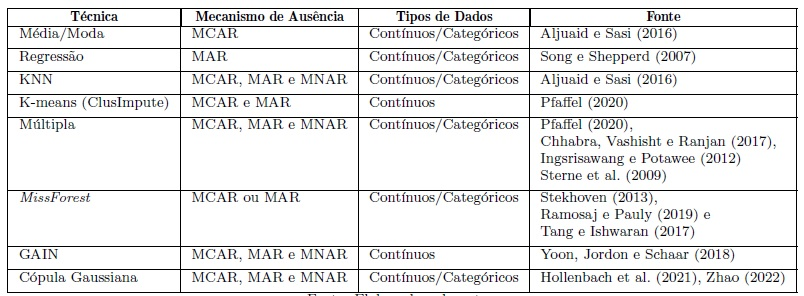


In [ ]:
method = input('Choose the number of imputation method: (1) Mean (2) KNN (3) MissForest (4) Multiple Imputation (5) KMeans (6) Regression (7) GAIN: (8) Copula-EM: ')

In [ ]:
# Sample imputation data -----------------------------------------
#%run imputation/imputation_methods.ipynb
if (method == '1'):
    complete_x = mean_imputation(X) #Complete data with predictive attributes
    complete_data = pd.concat([complete_x, y.set_index(complete_x.index) ], axis=1)
    imp_name = "Mean"
if (method == '2'):
    complete_x = knn_imputation(X, 10)#Complete data with predictive attributes
    complete_data = pd.concat([complete_x, y.set_index(complete_x.index) ], axis=1) 
    imp_name = "KNN"
if (method == '3'):
    complete_x = missforest_imputation(X)#Complete data with predictive attributes
    complete_data = pd.concat([complete_x, y.set_index(complete_x.index) ], axis=1)
    imp_name = "MissForest"
if (method == '4'):
    complete_x = multiple_imputation(X, 5)#Complete data with predictive attributes
    complete_data = pd.concat([complete_x, y.set_index(complete_x.index) ], axis=1)
    imp_name = "MI"
if (method == '5'):
    num_classes = np.size(data_y) #Get the number of classes
    complete_x = kmeans_imputation(X, num_classes, 100)#Complete data with predictive attributes
    complete_data = pd.concat([complete_x, y.set_index(complete_x.index) ], axis=1)
    imp_name = "KMeans"        
if (method == '6'):
    complete_x = regression_imputation(X)#Complete data with predictive attributes
    complete_data = pd.concat([complete_x, y.set_index(complete_x.index) ], axis=1)
    imp_name = "Regression"
if (method == '7'):
    gain_parameters = {'batch_size': 128,
                     'hint_rate': 0.9,
                     'alpha': 100,
                     'iterations': 1000}
    complete_x = gain_imputation(X.values, gain_parameters)#Complete data with predictive attributes
    complete_data = pd.concat([pd.DataFrame(complete_x, columns = columns[0:4]), y], axis=1)
    imp_name = "Gain"
    
if (method == '8'):
    complete_x = copula_imputation(X)#Complete data with predictive attributes
    complete_data = pd.concat([complete_x, y.set_index(complete_x.index) ], axis=1)

# Classifier Test

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
%run classifiers/classifiers.ipynb
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_features = 'auto', min_samples_leaf = 7, min_samples_split = 4, splitter = 'best')
if 'complete_data' in globals():
    classifiers(model, complete_data, 10, imp_name)
else:
    classifiers(model, original_data, 10)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
%run classifiers/classifiers.ipynb
model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'log2', min_samples_leaf = 3, min_samples_split = 4, n_estimators = 150)  

if 'complete_data' in globals():
    classifiers(model, complete_data, 10, imp_name)
else:
    classifiers(model, original_data, 10)

In [ ]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier
%run classifiers/classifiers.ipynb
model = MLPClassifier(activation = 'identity', alpha = 0.0001, hidden_layer_sizes = 15, learning_rate_init = 0.001, max_iter = 700, solver = 'adam')
if 'complete_data' in globals():
    classifiers(model, complete_data, 10, imp_name)
else:
    classifiers(model, original_data, 10)



In [ ]:
#SVM Classifier
from sklearn import svm
%run classifiers/classifiers.ipynb
model = svm.SVC(probability=True, C = 1, coef0 = 0, degree = 1, gamma = 'scale', kernel = 'rbf')    
if 'complete_data' in globals():
    classifiers(model, complete_data, 10, imp_name)
else:
    classifiers(model, original_data, 10)

# RMSE Evaluation

In [ ]:
#Let´s RMSE computing
%run evaluation/metrics.ipynb
original = True

#Test amputed MCAR data
if 'data_mcar_amputed_per' in globals():
    print('------------------------------------------')
    print("Root Mean Square Error (" + str(np.round(data_mcar_amputed_per,2)) + "% missing values): " + str(rmse(np.array(complete_x), np.array(X))))
    original = False
    print('------------------------------------------')

#Test amputed MAR data
if 'data_mar_amputed_per' in globals():
    print('------------------------------------------')
    print("Root Mean Square Error (" + str(np.round(data_mar_amputed_per,2)) + "% missing values): " + str(rmse(np.array(complete_x), np.array(X))))
    original = False
    print('------------------------------------------')

#Test amputed MNAR data
if 'data_mnar_amputed_per' in globals():
    print('------------------------------------------')
    print("Root Mean Square Error (" + str(np.round(data_mnar_amputed_per,2)) + "% missing values): " + str(rmse(np.array(complete_x), np.array(X))))
    original = False
    print('------------------------------------------')

if original: 
    print('------------------------------------------')
    print('Data Were Not Amputated')
    print('------------------------------------------')